In [15]:
path = '../../bluesky/archives'

In [10]:
!pwd

/mnt/e/Ana/mastodon-proj/notebooks


In [93]:
import json
import gzip
import glob
import datetime
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.dates import MonthLocator

In [169]:
files = glob.glob('../../bluesky/All_2023-08-18.json')
print(len(files))
with gzip.open(file, 'rb') as f:
    content = f.read().split(b'\n')
    print(content[:5])
    print(len(content))

1
[b'{"time_crawled": "2023-09-01 00:01:18.914", "name": "Benny Nine Cats", "account_url": "https://bsky.app/profile/teeveeben.bsky.social", "id": "teeveeben.bsky.social", "content": "\\u21b0Crap! I stayed the night in Lawrence, KS once", "content_url": "https://bsky.app/profile/teeveeben.bsky.social/post/3k6ckuolb2z2v", "avatar": "https://av-cdn.bsky.app/img/avatar/plain/did:plc:h5zlvjui3ahdzcpx6frgjatr/bafkreibs2z4urx55xm7cly2c36m2msbor43mc4noys4ogmgpwovc6bbvia@jpeg"}', b'{"time_crawled": "2023-09-01 00:01:18.914", "name": "Richard C", "account_url": "https://bsky.app/profile/richardc.bsky.social", "id": "richardc.bsky.social", "content": "\\u21b0My gf :)", "content_url": "https://bsky.app/profile/richardc.bsky.social/post/3k6ckuonhau24", "avatar": "https://av-cdn.bsky.app/img/avatar/plain/did:plc:hhscblqoho5zp7rgqj22dsiw/bafkreidqpvmjeu3ithc3trzoglrrleyuqwyqgg2cyhzy5pnp6tyfurgroe@jpeg"}', b'{"time_crawled": "2023-09-01 00:01:18.914", "name": "horax", "account_url": "https://bsky.app

In [146]:
files = glob.glob(path + '/*.json.gz')
print(len(files))

users_academics = defaultdict(lambda:defaultdict(lambda:0))
posts = []
for file in files:
    print(file)
    with gzip.open(file, 'rb') as f:
        contents = f.read().decode('ascii')
        contents = contents.split('\n')
        for content in contents[:-1]:
            temp = content
            post = json.loads(temp)
            
            if 'account' in post:
                user_name = post['account']
            elif 'name' in post:
                user_name = post['name']

            name = user_name.lower()
            if 'prof.' in name or 'phd' in name or 'dr.' in name:
                user_id = post['id']
                date = post['time_crawled'].split()[0]
                users_academics[user_id][date] += 1
                posts.append(post)
    

96
../../bluesky/archives/2023-05-25_combined.json.gz
../../bluesky/archives/2023-05-26_combined.json.gz
../../bluesky/archives/2023-05-27_combined.json.gz
../../bluesky/archives/2023-05-28_combined.json.gz
../../bluesky/archives/2023-05-29_combined.json.gz
../../bluesky/archives/2023-05-30_combined.json.gz
../../bluesky/archives/2023-05-31_combined.json.gz
../../bluesky/archives/2023-06-01_combined.json.gz
../../bluesky/archives/2023-06-02_combined.json.gz
../../bluesky/archives/2023-06-03_combined.json.gz
../../bluesky/archives/2023-06-04_combined.json.gz
../../bluesky/archives/2023-06-05_combined.json.gz
../../bluesky/archives/2023-06-06_combined.json.gz
../../bluesky/archives/2023-06-07_combined.json.gz
../../bluesky/archives/2023-06-08_combined.json.gz
../../bluesky/archives/2023-06-09_combined.json.gz
../../bluesky/archives/2023-06-10_combined.json.gz
../../bluesky/archives/2023-06-11_combined.json.gz
../../bluesky/archives/2023-06-12_combined.json.gz
../../bluesky/archives/2023-

In [147]:
len(posts)

83689

In [62]:
len(users_hist)

530242

In [78]:
len(users_academics)

1640

In [80]:
open('academics_on_bsky.json', 'w').write(json.dumps(users_academics))

343068

In [118]:
users_academics = json.loads(open('academics_on_bsky.json').read())

In [88]:
X = []
for user, hist_post in users_academics.items():
    datetime_str = min(hist_post)
    datetime_object = datetime.datetime.strptime(datetime_str, '%Y-%m-%d')
    X.append(datetime_object)

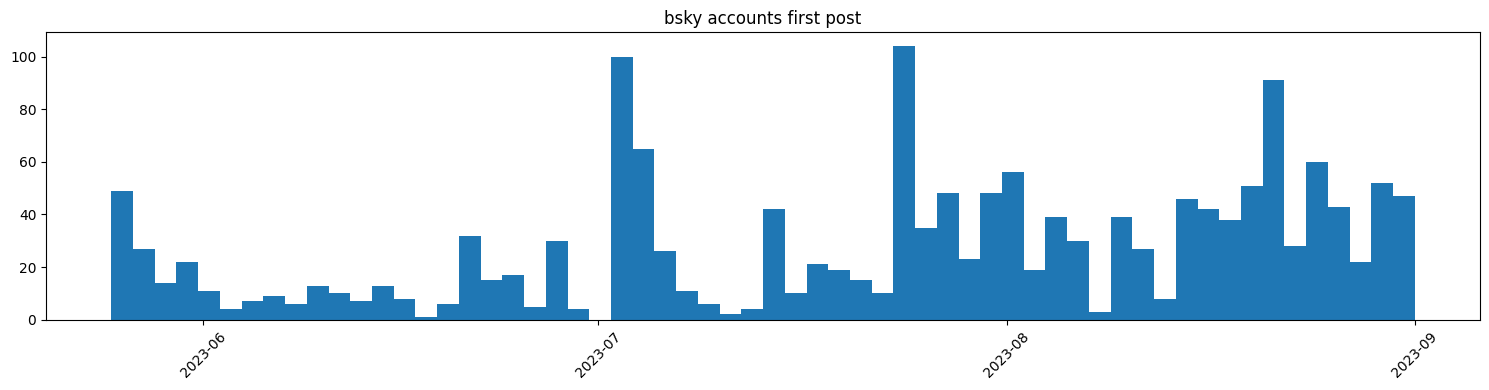

In [100]:
x = X

plt.figure(figsize=(15, 4))
unique, count = np.unique(x, return_counts=True)
plt.hist(x, bins=60)
# plt.axvline(x=datetime.date(2022, 10, 22), color='red')

ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_locator(MonthLocator())
plt.xticks(rotation=45)
# plt.yscale('log')
plt.title('bsky accounts first post')
plt.tight_layout()
plt.savefig('bsky_accounts_first.png')

In [127]:
def frequency(toots):
    if len(toots) >= 5:
        diffs = defaultdict(lambda:0)
        temp = toots.keys()
        first = datetime.datetime.strptime(min(temp), '%Y-%m-%d')
        for current, ntoots in toots.items():
            current_date = datetime.datetime.strptime(current, '%Y-%m-%d')
            diff = current_date - first
            diffs[diff.days//7] += ntoots   
        return diffs
    else:
        return []
    
for user, values in users_academics.items():
    users_frequency_weeks.append(frequency(values))

704
14


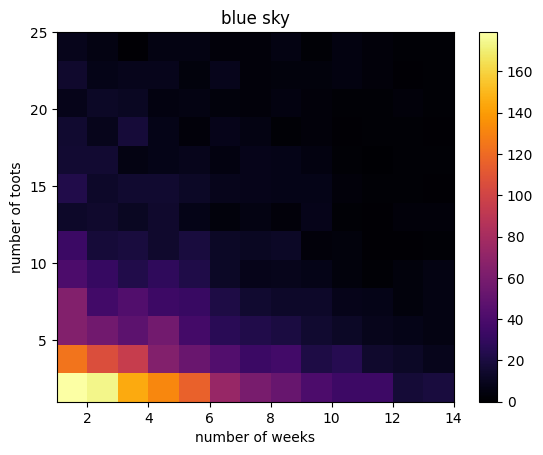

In [145]:
X = []
Y = []
for row in users_frequency_weeks:
    if row == []:
        continue
    for x,y in row.items():
        X.append(x)
        Y.append(y)

print(max(Y))
print(max(X))
xbins = np.linspace(1, max(X), 14)
ybins = np.linspace(min(Y), 25, 14)

ax = plt.gca()
ax.set_facecolor("black")
im = ax.hist2d(X, Y, bins=(xbins, ybins), cmap='inferno') #vmin=1,vmax=10000))
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('number of weeks')
ax.set_ylabel('number of toots')
plt.title('blue sky')
plt.colorbar(im[3], ax=ax)
plt.savefig('bluesky_freq_weeks.png')

In [151]:
for post in posts[:100]:
    if '↰' in post['content']:
        print(post['content'])

↰Sick transit, Gloria
↰She’s quite private
↰[image:Adele music video singing "Hello from the other side"]
↰Thank you 😭
↰Always the hardest part!
↰Design ideas. I’m a doctor/school board trustee, not a designer. Want to print up posters that we can carry in solidarity with students and staff. A design I could then share with trustees across Canada and elsewhere.
↰The question that tells them I am Interested in This Job.

I paused, quickly running a million scenarios, and then i decided (Dr strange one finger dot gif) and i said

"Is this an anti-racist department?"
↰I can tell you they had not prepped for this!
↰FOUR MONTHS LATER i realize what i should have said lolol.
↰*double cleanse 
I just have very moody skin. It’s just like my hedgehog!
↰In academia i had to give up fighting for students because i was being treated so terribly for it, it was disgusting.
↰The people here are very weird .
↰https://bsky.app/profile/m10.bsky.social/post/3jwmaf5gljl2u
↰Star Trek is the one where he cu